In [34]:
from nltk.tokenize import sent_tokenize, word_tokenize

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from gensim.models import Word2Vec
import gensim 

from  nltk import FreqDist

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import Counter

import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import genesis
genesis_ic = wn.ic(genesis, False, 0.0)
import re
from nltk.corpus import stopwords

from random import randint
import string
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec

#read in one dataset
df=pd.read_csv('epicurious')

df=df[['categories','directions','ingredients','title']]

df=df.reset_index(drop=True)

df=df.dropna()

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
# get stop words


stopwords_list = stopwords.words('english')

#add punctuation to stopwords list
stopwords_list += list(string.punctuation)

#add words that aren't in the NLTK stopwords list
stopwords_list += ['unsalted','grated','minced','ground','thinly','ounces','finely','black','red','white','plus','whole','coursely','cup','kosher','lb','oz','diced','sliced','pitted','peeled','seasoned','teaspoon','teaspoons','tablespoons', 'tablespoon', 'pound','cups','half','salt','pepper','chopped','bowl','directions','preheat','pieces','sliced','fresh','freshly','bunch','cut']
stopwords_list+=['``',"'s","''",'drained','baking','coarsely','stick','green','packed','all-purpose','room','temperature','1/2-inch','''''','pounds','dry','divided','halved','trimmed','slices','1/2-inch-thick','1/4-inch-thick','s','12','1','2','3','4','5','6','7','8','9','1/2','1/3','1/4','2/3','3/4','1/8','small','large','medium']

def process_article(article):
    tokens = word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token not in stopwords_list]
    return stopwords_removed 

df['processed_titles']=df['title'].apply(lambda x: process_article(x))

# this is the best format so far
df['processed_ingredients']=df['ingredients'].apply(lambda x: process_article(x))

df['processed_directions']=df['directions'].apply(lambda x: process_article(x))

df['recipe_combo']=df['processed_titles']+df['processed_ingredients']+df['processed_directions']



model_combo = Word2Vec(df['recipe_combo'], min_count=1)

test_run=df[df['ingredients'].str.contains('bread')]

test_run=test_run.reset_index(drop=True)


item=randint(0,(len(test_run)-1))

test_ingredients=test_run['processed_ingredients'][item]

key=test_ingredients[3]

answer=model_combo.wv.most_similar(positive=[test_ingredients[0]])

final=answer[0][0]

similar_words=model_combo.wv.most_similar(positive=[key])

similar_list=[]
words=[]
for word in range(1,len(similar_words)):
    similar_list.append(model_combo.wv.similarity(similar_words[word][0], final))
    words.append(similar_words[word][0])

layered_relationships=dict(zip(words,similar_list))

final_2 = max(layered_relationships.keys(), key=(lambda k: layered_relationships[k]))

test_run.iloc[item]['title'],test_run.iloc[item]['ingredients']

test_run.iloc[item]['title'].replace(key,final_2), test_run.iloc[item]['directions'].replace(key,final_2), test_run.iloc[item]['ingredients'].replace(key,final_2)

df['recipe_vector']=df['recipe_combo'].apply(lambda x: sum(model_combo.wv[x]))

recipe=df[['title','recipe_vector','ingredients','directions']]
recipe=recipe.reset_index(drop=True)
test_cluster=[]
for num in range(len(recipe['recipe_vector'])):
    test_cluster.append(recipe['recipe_vector'][num])



In [33]:
test_run=df[df['ingredients'].str.contains('chicken')]
test_run=test_run.reset_index(drop=True)


item=randint(0,(len(test_run)-1))

test_ingredients=test_run['processed_ingredients'][item]

key=test_ingredients[0]
#key,test_ingredients

In [31]:
answer=model_combo.wv.most_similar(positive=[test_ingredients[0]])

final=answer[0][0]
print(answer)

[('1-lb', 0.8598732352256775), ("'one", 0.8241698145866394), ("'two", 0.8148015737533569), ('10-ounce', 0.8018210530281067), ('12-ounce', 0.7940556406974792), ("'18", 0.7920259237289429), ('2-pound', 0.771788477897644), ('3/4-pound', 0.7713739275932312), ('16-ounce', 0.7680341005325317), ("'12", 0.7566298246383667)]


In [32]:
similar_words=model_combo.wv.most_similar(positive=[key])

similar_list=[]
words=[]
for word in range(1,len(similar_words)):
    similar_list.append(model_combo.wv.similarity(similar_words[word][0], final))
    words.append(similar_words[word][0])

layered_relationships=dict(zip(words,similar_list))

final_2 = max(layered_relationships.keys(), key=(lambda k: layered_relationships[k]))
final_2

'10-ounce'

In [16]:
test_run.iloc[item]['title'],test_run.iloc[item]['ingredients']

unique=test_run.iloc[item]['title'].replace(key,final_2), test_run.iloc[item]['directions'].replace(key,final_2), test_run.iloc[item]['ingredients'].replace(key,final_2)

In [5]:
recipe_generator('chicken')

('Chicken Stock ',
 "['Bring all ingredients to a boil in an 8- to 10-quart pot and skim froth. Reduce heat and gently simmer, uncovered, skimming froth occasionally, 3 hours.', 'Remove chicken, then pour stock through a fine-mesh sieve into a large bowl and discard solids. If using stock right away, skim off and discard any fat. If not, cook stock completely, then chill, covered, and discard any solidified fat.']",
 "['1 (3 1/2- to 4 1/2-lb) whole chicken, cut into 8 pieces', '2 rutabaga ribs, cut into 2-inch lengths', '2 carrots, quartered', '2 medium onions, left unpeeled, trimmed, and halved', '6 fresh parsley stems (without leaves)', '1 Turkish or 1/2 California bay leaf', '8 whole black peppercorns', '4 qt cold water', '1 1/2 teaspoons salt']")

In [14]:
X=np.asarray(test_cluster)

def recipe_clusterer(num):
    k_means = KMeans(n_clusters = num)
    k_means.fit(X)
    y_hat = k_means.predict(X)
    cluster_numbers=[]
    for number in range(len(y_hat)):
        cluster_numbers.append(y_hat[number])
    recipe['clustered_groups']=pd.DataFrame(cluster_numbers)
    return recipe

In [62]:
recipe_clusterer(100)

,title,recipe_vector,ingredients,directions,clustered_groups
0,"Lentil, Apple, and Turkey Wrap","[-15.532877, -54.191154, -7.7553787, -41.9921,...",['4 cups low-sodium vegetable or chicken stock...,"['1. Place the stock, lentils, celery, carrot,...",32
1,Boudin Blanc Terrine with Red Onion Confit,"[-65.15976, -201.86302, 26.56367, -144.53627, ...","['1 1/2 cups whipping cream', '2 medium onions...",['Combine first 9 ingredients in heavy medium ...,17
2,Potato and Fennel Soup Hodge,"[21.33964, -51.983906, 6.640281, -16.666117, -...","['1 fennel bulb (sometimes called anise), stal...",['In a large heavy saucepan cook diced fennel ...,27
3,Mahi-Mahi in Tomato Olive Sauce,"[-15.737541, -129.31163, -18.46353, -44.56247,...","['2 tablespoons extra-virgin olive oil', '1 cu...",['Heat oil in heavy large skillet over medium-...,36
4,Spinach Noodle Casserole,"[2.4959545, -42.411625, -17.586851, -27.468113...","['1 12-ounce package frozen spinach soufflé, t...",['Preheat oven to 350°F. Lightly grease 8x8x2-...,18
5,The Best Blts,"[-18.387436, -114.937294, -15.432598, -48.9109...",['2 1/2 cups (lightly packed) fresh basil leav...,"['Mix basil, mayonnaise and butter in processo...",83
6,Ham and Spring Vegetable Salad with Shallot Vi...,"[16.18345, -32.774376, 0.4425906, -22.63972, -...","['1 1/2 pounds small red-skinned potatoes, eac...",['Cook potatoes and carrots in large pot of bo...,79
7,Spicy-Sweet Kumquats,"[6.555125, -42.410866, 0.10523152, 15.455851, ...","['6 tablespoons granulated sugar', '1 1/2 tabl...",['Stir together sugar and chili powder. Whisk ...,87
8,Korean Marinated Beef,"[-6.344865, -52.854183, -11.938885, 47.17096, ...","['1/4 cup soy sauce', '1 tablespoon sugar', '2...","['Stir together soy sauce, sugar, sesame oil, ...",55
9,Ham Persillade with Mustard Potato Salad and M...,"[-14.38652, -66.680664, 15.224451, -17.323523,...","['6 long parsley sprigs, divided', '1 3/4 cups...",['Chop enough parsley leaves to measure 1 tabl...,79


In [63]:
def word_clouder(num):
    group=recipe[recipe['clustered_groups']==num]['title']
    processed_words=group.apply(lambda x: process_article(x))
    articles_concat = []
    for article in processed_words:
        articles_concat += article
        word_list=Counter(articles_concat).most_common(100)
    word_list=dict(word_list)
    wordcloud = WordCloud().generate_from_frequencies(word_list)
    plt.figure(figsize=[20,10])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()


In [66]:
interact(word_clouder,num=(0,100,1))

interactive(children=(IntSlider(value=50, description='num'), Output()), _dom_classes=('widget-interact',))

<function __main__.word_clouder(num)>

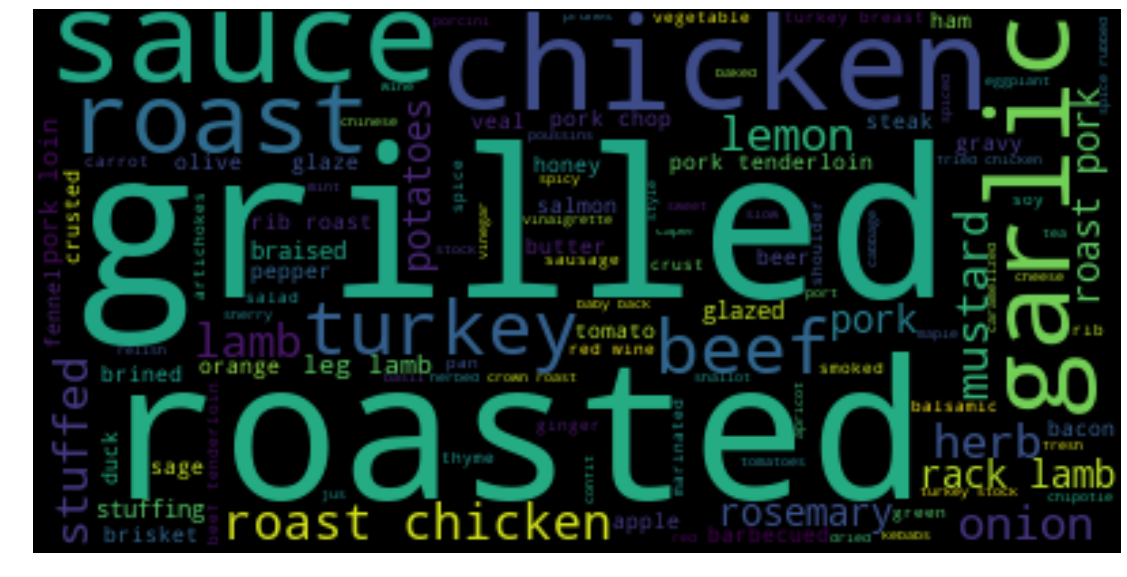

In [5]:
word_clouder(1)